In [1]:
%load_ext autoreload
%autoreload 2
from phasicdoorkey import PhasicDoorKeyEnv
import matplotlib.pyplot as plt

from scripts.train import train
from scripts.visualize import visualize
from utils.format import train_arg_parser, visualize_arg_parser


In [2]:
env_p1_l = PhasicDoorKeyEnv(phase=1, door_locked=True, size=7, max_steps=100, render_mode="rgb_array")
env_p1_u = PhasicDoorKeyEnv(phase=1, door_locked=False, size=7, max_steps=100, render_mode="rgb_array")
env_p2_l = PhasicDoorKeyEnv(phase=2, door_locked=True, size=7, max_steps=100, render_mode="rgb_array")
env_p2_u = PhasicDoorKeyEnv(phase=2, door_locked=False, size=7, max_steps=100, render_mode="rgb_array")
env_p3_l = PhasicDoorKeyEnv(phase=3, door_locked=True, size=7, max_steps=100, render_mode="rgb_array")
env_p3_u = PhasicDoorKeyEnv(phase=3, door_locked=False, size=7, max_steps=100, render_mode="rgb_array")

envs = [env_p1_l, env_p1_u, env_p2_l, env_p2_u, env_p3_l, env_p3_u]
names = ["Phase 1 locked", "Phase 1 unlocked", "Phase 2 locked", "Phase 2 unlocked", "Phase 3 locked", "Phase 3 unlocked"]

In [ ]:
for name, env in zip(names, envs):
    env.reset()
    img = env.render()

    # Plot the rendered image
    plt.imshow(img)
    plt.title(name)
    plt.show()
    # plt.close()

In [4]:
version = "v0.5"

In [5]:
envs = []
for _ in range(100):
    envs.append(PhasicDoorKeyEnv(phase=3, door_locked=True, size=7, max_steps=500))#, render_mode="rgb_array"))


In [ ]:
# train on first env
train_args = train_arg_parser("ppo", envs, model=f"model_{version}", frames=1e6)

train(train_args)



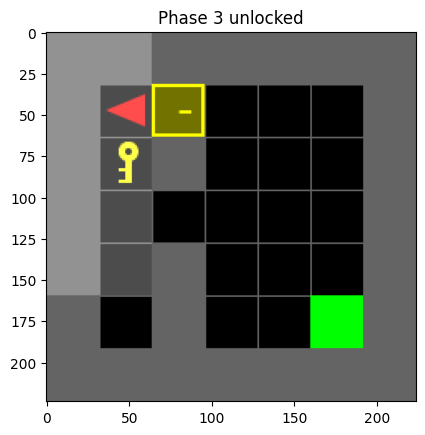

In [18]:
env = PhasicDoorKeyEnv(phase=3, door_locked=True, size=7, max_steps=500, render_mode="rgb_array")
env.reset()
img = env.render()

# Plot the rendered image
plt.imshow(img)
plt.title(name)
plt.show()

In [19]:
%%capture  
# use capture to avoid generating unneeded output

# env = PhasicDoorKeyEnv(phase=1, door_locked=True, size=7, max_steps=100, render_mode="human")
# env.reset()

env_p3_u.render_mode = "human"
env_p3_u.door_locked=True

env.render_mode = "human"
env.reset()
visualize_args = visualize_arg_parser(env, f"model_{version}", gif=f"gifs/gif_{version}", episodes=1)

visualize(visualize_args)

In [68]:
import pandas as pd

In [69]:
df = pd.read_csv("storage/model_v0.3/log.csv")

In [70]:
df.columns

Index(['update', 'frames', 'FPS', 'duration', 'rreturn_mean', 'rreturn_std',
       'rreturn_min', 'rreturn_max', 'num_frames_mean', 'num_frames_std',
       'num_frames_min', 'num_frames_max', 'entropy', 'value', 'policy_loss',
       'value_loss', 'grad_norm', 'return_mean', 'return_std', 'return_min',
       'return_max'],
      dtype='object')

In [72]:
df['return_max'].value_counts()

0.0                    377
return_max              10
0.16300000250339508      2
0.5139999985694885       2
0.7749999761581421       1
0.1720000058412552       1
0.42399999499320984      1
0.6039999723434448       1
0.15399999916553497      1
0.2529999911785126       1
0.19900000095367432      1
0.33399999141693115      1
0.23499999940395355      1
0.3070000112056732       1
0.34299999475479126      1
Name: return_max, dtype: int64